In [1]:
print("Hello")

Hello


In [3]:
import numpy as np # linear algebra
import pandas as pd # data pro

In [4]:
data=pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


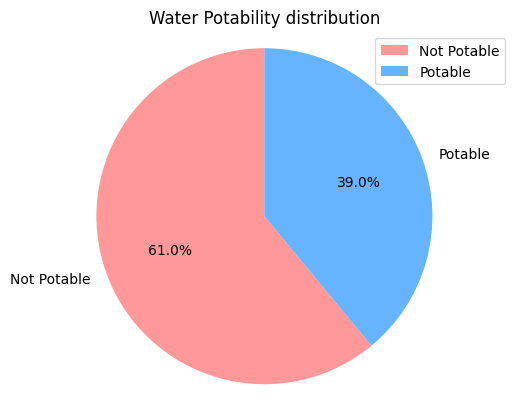

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['Not Potable', 'Potable']
sizes=data['Potability'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Water Potability distribution')
plt.axis('equal')
plt.legend()
plt.show()

In [9]:
data.fillna(
    {
        'ph': data['ph'].mean(),
        'Sulfate': data['Sulfate'].mean(),
        'Trihalomethanes': data['Trihalomethanes'].mean()
    },
    inplace=True
)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load and preprocess
scaler = StandardScaler()
X = data.drop(columns='Potability')
Y = data['Potability']
X_scaled = scaler.fit_transform(X)

# Split with stratification (preserves class balance in splits)
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.3, random_state=42, stratify=Y
)

# Train with balanced class weights
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = log_reg.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56       600
           1       0.41      0.55      0.47       383

    accuracy                           0.52       983
   macro avg       0.52      0.52      0.52       983
weighted avg       0.55      0.52      0.53       983

Confusion Matrix:
 [[301 299]
 [173 210]]
